In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pysal as ps
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from math import ceil
from pandas import * 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

/Users/axleabner/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [7]:
dfman= pd.read_csv(f'manh.csv',error_bad_lines=False)

In [10]:
dfmanP= pd.read_csv(f'ManhP.csv',error_bad_lines=False)

In [11]:
dfmanD= pd.read_csv(f'ManhD.csv',error_bad_lines=False)

In [12]:
dfmanP['lpep_pickup_datetime']  = dfmanP['lpep_pickup_datetime'].apply(pd.to_datetime)

In [13]:
dfmanP['lpep_dropoff_datetime']  = dfmanP['lpep_dropoff_datetime'].apply(pd.to_datetime)

In [14]:
dfmanD['lpep_pickup_datetime']  = dfmanD['lpep_pickup_datetime'].apply(pd.to_datetime)

In [15]:
dfmanD['lpep_dropoff_datetime']  = dfmanD['lpep_dropoff_datetime'].apply(pd.to_datetime)

In [16]:
dfmanP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799136 entries, 0 to 799135
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             799136 non-null  int64         
 1   Unnamed: 0.1           799136 non-null  int64         
 2   LocationID             799136 non-null  int64         
 3   zone                   799136 non-null  object        
 4   lpep_pickup_datetime   799136 non-null  datetime64[ns]
 5   lpep_dropoff_datetime  799136 non-null  datetime64[ns]
 6   store_and_fwd_flag     712201 non-null  object        
 7   RatecodeID             712201 non-null  float64       
 8   PULocationID           799136 non-null  int64         
 9   DOLocationID           799136 non-null  int64         
 10  passenger_count        712201 non-null  float64       
 11  trip_distance          799136 non-null  float64       
 12  fare_amount            799136 non-null  floa

In [17]:
dfmanP

,Unnamed: 0,Unnamed: 0.1,LocationID,zone,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0,0,4,Alphabet City,2020-02-02 17:19:57,2020-02-02 17:36:21,N,1.0,4,256,...,0.00,0.5,0.0,0.00,NaN,0.3,14.80,1.0,1.0,0.0
1,1,1,4,Alphabet City,2020-02-03 16:24:10,2020-02-03 16:57:50,N,1.0,4,159,...,0.00,0.5,0.0,6.12,NaN,0.3,35.12,1.0,1.0,0.0
2,2,2,4,Alphabet City,2020-02-05 17:37:42,2020-02-05 17:51:22,N,1.0,4,256,...,1.00,0.5,0.0,0.00,NaN,0.3,14.30,1.0,1.0,0.0
3,3,3,4,Alphabet City,2020-02-25 18:23:48,2020-02-25 18:41:42,N,1.0,4,256,...,1.00,0.5,0.0,0.00,NaN,0.3,15.80,1.0,1.0,0.0
4,4,4,4,Alphabet City,2020-02-26 12:39:51,2020-02-26 12:51:07,N,1.0,4,148,...,0.00,0.5,0.0,0.00,NaN,0.3,9.30,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799131,799131,146279,263,Yorkville West,2020-02-28 17:15:00,2020-02-28 17:28:00,NaN,NaN,263,74,...,2.75,0.0,0.0,0.00,NaN,0.3,19.63,NaN,NaN,NaN
799132,799132,146280,263,Yorkville West,2020-02-29 04:48:00,2020-02-29 05:11:00,NaN,NaN,263,92,...,2.75,0.0,0.0,6.12,NaN,0.3,45.96,NaN,NaN,NaN
799133,799133,146281,263,Yorkville West,2020-02-29 10:54:00,2020-02-29 11:07:00,NaN,NaN,263,232,...,2.75,0.0,0.0,0.00,NaN,0.3,32.34,NaN,NaN,NaN
799134,799134,146282,263,Yorkville West,2020-02-29 11:14:00,2020-02-29 11:51:00,NaN,NaN,263,216,...,2.75,0.0,0.0,6.12,NaN,0.3,67.67,NaN,NaN,NaN


In [18]:
dfmanP = dfmanP.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [19]:
dfmanP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799136 entries, 0 to 799135
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   LocationID             799136 non-null  int64         
 1   zone                   799136 non-null  object        
 2   lpep_pickup_datetime   799136 non-null  datetime64[ns]
 3   lpep_dropoff_datetime  799136 non-null  datetime64[ns]
 4   store_and_fwd_flag     712201 non-null  object        
 5   RatecodeID             712201 non-null  float64       
 6   PULocationID           799136 non-null  int64         
 7   DOLocationID           799136 non-null  int64         
 8   passenger_count        712201 non-null  float64       
 9   trip_distance          799136 non-null  float64       
 10  fare_amount            799136 non-null  float64       
 11  extra                  799136 non-null  float64       
 12  mta_tax                799136 non-null  floa

In [20]:
dfmanP.describe()

,LocationID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,799136.000000,712201.000000,799136.000000,799136.000000,712201.000000,799136.000000,799136.000000,799136.000000,799136.000000,799136.000000,799136.000000,0.0,799136.000000,799136.000000,712201.000000,712201.000000,712201.000000
mean,95.831574,1.056167,95.831574,132.630396,1.288323,5.203530,12.702850,0.495204,0.441607,1.240516,0.259148,NaN,0.296478,16.046014,1.461764,1.013840,0.778287
std,63.528658,0.458746,63.528658,78.268912,0.971627,462.099536,10.410434,0.856652,0.164687,2.066277,1.289457,NaN,0.038555,12.124520,0.520594,0.116827,1.238685
min,4.000000,1.000000,4.000000,1.000000,0.000000,-33.690000,-70.090000,-4.500000,-0.500000,-2.800000,-6.120000,NaN,-0.300000,-65.800000,1.000000,1.000000,-2.750000
25%,42.000000,1.000000,42.000000,71.000000,1.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,8.190000,1.000000,1.000000,0.000000
50%,74.000000,1.000000,74.000000,131.000000,1.000000,1.700000,9.000000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,12.060000,1.000000,1.000000,0.000000
75%,116.000000,1.000000,116.000000,225.000000,1.000000,3.330000,15.500000,1.000000,0.500000,2.150000,0.000000,NaN,0.300000,20.050000,2.000000,1.000000,2.750000
max,263.000000,6.000000,263.000000,265.000000,9.000000,170783.440000,803.000000,8.250000,3.550000,449.600000,96.120000,NaN,0.300000,803.800000,5.000000,2.000000,2.750000


In [17]:
dfmanD

,Unnamed: 0,Unnamed: 0.1,LocationID,zone,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0,0,4,Alphabet City,2.0,2020-02-01 00:57:55,2020-02-01 01:17:03,N,1.0,97,...,0.50,0.5,0.00,0.00,NaN,0.3,22.55,2.0,1.0,2.75
1,1,1,4,Alphabet City,2.0,2020-01-31 23:59:44,2020-02-01 00:12:50,N,1.0,256,...,0.50,0.5,3.21,0.00,NaN,0.3,19.26,1.0,1.0,2.75
2,2,2,4,Alphabet City,2.0,2020-02-01 00:33:50,2020-02-01 00:55:36,N,1.0,7,...,0.50,0.5,5.01,0.00,NaN,0.3,30.06,1.0,1.0,2.75
3,3,3,4,Alphabet City,1.0,2020-02-01 01:31:54,2020-02-01 01:45:12,N,1.0,112,...,3.25,0.5,0.00,0.00,NaN,0.3,18.55,2.0,1.0,2.75
4,4,4,4,Alphabet City,2.0,2020-02-01 01:37:05,2020-02-01 01:54:50,N,1.0,37,...,0.50,0.5,3.81,0.00,NaN,0.3,22.86,1.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633425,633425,26717,263,Yorkville West,NaN,2021-02-24 13:48:00,2021-02-24 14:09:00,NaN,NaN,263,...,2.75,0.0,0.00,0.00,NaN,0.3,27.37,NaN,NaN,NaN
633426,633426,26718,263,Yorkville West,NaN,2021-02-24 14:31:00,2021-02-24 15:01:00,NaN,NaN,263,...,2.75,0.0,0.00,0.00,NaN,0.3,27.37,NaN,NaN,NaN
633427,633427,26719,263,Yorkville West,NaN,2021-02-25 12:37:00,2021-02-25 13:01:00,NaN,NaN,263,...,2.75,0.0,0.00,0.00,NaN,0.3,29.00,NaN,NaN,NaN
633428,633428,26720,263,Yorkville West,NaN,2021-02-25 14:56:00,2021-02-25 15:55:00,NaN,NaN,263,...,2.75,0.0,0.00,6.12,NaN,0.3,45.61,NaN,NaN,NaN


In [21]:
meanD = dfmanD.groupby(['LocationID']).mean()


In [22]:
meanD

,Unnamed: 0,Unnamed: 0.1,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
LocationID,,,,,,,,,,,,,,,,,,,
4,161481.538043,140.471467,1.807927,1.048780,66.248641,52.148098,1.411585,47.478845,26.193791,1.003736,0.246603,1.748043,0.846984,NaN,0.297962,31.296902,1.314024,1.012195,2.489329
12,22617.961538,442.384615,1.545455,1.545455,124.692308,14.500000,1.363636,7.329231,25.198077,1.096154,0.365385,1.500769,1.176923,NaN,0.265385,30.766154,1.227273,1.136364,2.125000
13,48271.851324,610.411405,1.821705,1.072351,80.515275,28.741344,1.366925,64.875295,24.573870,0.831466,0.394094,2.898187,1.084827,NaN,0.296945,31.898635,1.222222,1.010336,2.678941
24,254082.765142,796.191527,1.833795,1.016464,48.837146,92.279961,1.270884,2.245891,10.868545,0.410197,0.461421,1.317859,0.128189,NaN,0.297922,13.961171,1.390468,1.004853,0.595104
41,308493.444075,5255.276963,1.858515,1.050075,46.816822,98.752449,1.254444,4.238739,9.936489,0.353661,0.459600,0.909228,0.113002,NaN,0.297039,12.440157,1.531712,1.012126,0.438214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,186662.889357,135797.198103,1.825137,1.038251,127.209694,230.860906,1.315574,7.126280,25.663646,0.866438,0.388830,2.853119,0.729694,NaN,0.294942,32.573435,1.211749,1.009563,2.693648
249,196385.284712,135164.784011,1.834915,1.030361,129.542777,233.416550,1.286528,6.244544,24.084109,0.996844,0.373773,2.840898,0.489888,NaN,0.295372,30.793506,1.185958,1.013283,2.702087
261,212252.582301,128809.499115,1.798137,1.024845,127.847788,230.546903,1.304348,7.930779,27.373469,1.033628,0.291150,1.822265,1.526903,NaN,0.298407,33.613611,1.242236,1.003106,2.579193


In [23]:
meanP = dfmanP.groupby(['LocationID']).mean()
meanP

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
LocationID,,,,,,,,,,,,,,,,
4,1.000000,4.0,128.948560,1.444444,65.652778,28.546708,1.439300,0.067901,1.029835,1.018909,NaN,0.300000,32.408313,1.000000,1.000000,0.000000
12,NaN,12.0,181.250000,NaN,4.375000,36.193750,1.375000,0.125000,0.000000,3.060000,NaN,0.300000,41.053750,NaN,NaN,NaN
13,1.000000,13.0,147.862385,1.000000,274.798073,40.825321,1.614679,0.068807,0.756881,2.919633,NaN,0.297248,46.527982,1.000000,1.000000,0.000000
24,1.012427,24.0,127.930876,1.268713,2.358335,11.371662,0.479108,0.462333,1.462164,0.150632,NaN,0.296841,14.944138,1.360234,1.002924,0.910490
41,1.042762,41.0,108.712076,1.239384,3.571208,10.166434,0.400483,0.466748,0.931615,0.125920,NaN,0.296672,12.808257,1.521774,1.010417,0.494848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,3.000000,246.0,135.095808,1.333333,10.387305,35.504790,0.839820,0.011976,1.393054,2.203114,NaN,0.296407,40.249162,1.500000,1.333333,0.000000
249,1.000000,249.0,139.251908,1.000000,6.856260,28.378626,1.221374,0.064885,1.343511,1.045191,NaN,0.300000,32.353588,1.000000,1.000000,0.000000
261,1.000000,261.0,115.339286,1.000000,10.962723,38.641384,1.510045,0.053571,0.773438,2.247902,NaN,0.300000,43.535045,1.000000,1.000000,0.000000


In [24]:
dfmanP.head()

,LocationID,zone,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,4,Alphabet City,2020-02-02 17:19:57,2020-02-02 17:36:21,N,1.0,4,256,1.0,2.59,...,0.0,0.5,0.0,0.00,NaN,0.3,14.80,1.0,1.0,0.0
1,4,Alphabet City,2020-02-03 16:24:10,2020-02-03 16:57:50,N,1.0,4,159,1.0,0.00,...,0.0,0.5,0.0,6.12,NaN,0.3,35.12,1.0,1.0,0.0
2,4,Alphabet City,2020-02-05 17:37:42,2020-02-05 17:51:22,N,1.0,4,256,1.0,2.61,...,1.0,0.5,0.0,0.00,NaN,0.3,14.30,1.0,1.0,0.0
3,4,Alphabet City,2020-02-25 18:23:48,2020-02-25 18:41:42,N,1.0,4,256,1.0,2.60,...,1.0,0.5,0.0,0.00,NaN,0.3,15.80,1.0,1.0,0.0
4,4,Alphabet City,2020-02-26 12:39:51,2020-02-26 12:51:07,N,1.0,4,148,5.0,1.28,...,0.0,0.5,0.0,0.00,NaN,0.3,9.30,1.0,1.0,0.0


In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
dfPweek2 = dfmanP.groupby(pd.Grouper(key='lpep_pickup_datetime', freq='W')).count()

In [27]:
dfPweek2 =dfPweek2.tail(48)
dfPweek2.head()

,LocationID,zone,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,
2020-02-09,72144,72144,72144,66476,66476,72144,72144,66476,72144,72144,72144,72144,72144,72144,0,72144,72144,66476,66476,66476
2020-02-16,71502,71502,71502,65710,65710,71502,71502,65710,71502,71502,71502,71502,71502,71502,0,71502,71502,65710,65710,65710
2020-02-23,66088,66088,66088,60940,60940,66088,66088,60940,66088,66088,66088,66088,66088,66088,0,66088,66088,60940,60940,60940
2020-03-01,69532,69532,69532,64250,64250,69532,69532,64250,69532,69532,69532,69532,69532,69532,0,69532,69532,64250,64250,64250
2020-03-08,34441,34441,34441,31822,31822,34441,34441,31822,34441,34441,34441,34441,34441,34441,0,34441,34441,31822,31822,31822


In [28]:
dfPweek = dfmanP.groupby(pd.Grouper(key='lpep_pickup_datetime', freq='W')).sum()

In [29]:
dfPweek = dfPweek.tail(48)

In [30]:
dfPweek.head()

,LocationID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,
2020-02-09,7022228,69474.0,7022228,9731572,84790.0,197319.30,883170.42,44940.50,33415.0,86720.92,17006.50,0.0,21238.8,1.131797e+06,95840.0,67262.0,52675.5
2020-02-16,7030314,68840.0,7030314,9531990,83986.0,194971.78,879506.86,45556.50,32663.1,83761.14,17215.48,0.0,21172.8,1.123591e+06,95238.0,66522.0,50976.5
2020-02-23,6527720,63738.0,6527720,8995124,78056.0,201763.46,808013.90,40736.00,30068.0,79694.08,15749.48,0.0,19654.2,1.036750e+06,87442.0,61690.0,49375.5
2020-03-01,6826139,67714.0,6826139,9201983,83897.0,212927.69,852023.61,43331.75,31622.0,79621.42,16378.74,0.0,20648.4,1.084168e+06,94187.0,65148.0,47554.5
2020-03-08,3341424,33672.0,3341424,4578217,41773.0,91926.63,402824.88,13108.25,15655.5,39026.38,7395.60,0.0,10211.7,5.087552e+05,46750.0,32295.0,23548.5


In [31]:
dfPweek2.head()

,LocationID,zone,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,
2020-02-09,72144,72144,72144,66476,66476,72144,72144,66476,72144,72144,72144,72144,72144,72144,0,72144,72144,66476,66476,66476
2020-02-16,71502,71502,71502,65710,65710,71502,71502,65710,71502,71502,71502,71502,71502,71502,0,71502,71502,65710,65710,65710
2020-02-23,66088,66088,66088,60940,60940,66088,66088,60940,66088,66088,66088,66088,66088,66088,0,66088,66088,60940,60940,60940
2020-03-01,69532,69532,69532,64250,64250,69532,69532,64250,69532,69532,69532,69532,69532,69532,0,69532,69532,64250,64250,64250
2020-03-08,34441,34441,34441,31822,31822,34441,34441,31822,34441,34441,34441,34441,34441,34441,0,34441,34441,31822,31822,31822


In [32]:
dfPweek.index

DatetimeIndex(['2020-02-09', '2020-02-16', '2020-02-23', '2020-03-01',
               '2020-03-08', '2020-03-15', '2020-03-22', '2020-03-29',
               '2020-04-05', '2020-04-12', '2020-04-19', '2020-04-26',
               '2020-05-03', '2020-05-10', '2020-05-17', '2020-05-24',
               '2020-05-31', '2020-06-07', '2020-06-14', '2020-06-21',
               '2020-06-28', '2020-07-05', '2020-07-12', '2020-07-19',
               '2020-07-26', '2020-08-02', '2020-08-09', '2020-08-16',
               '2020-08-23', '2020-08-30', '2020-09-06', '2020-09-13',
               '2020-09-20', '2020-09-27', '2020-10-04', '2020-10-11',
               '2020-10-18', '2020-10-25', '2020-11-01', '2020-11-08',
               '2020-11-15', '2020-11-22', '2020-11-29', '2020-12-06',
               '2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03'],
              dtype='datetime64[ns]', name='lpep_pickup_datetime', freq='W-SUN')

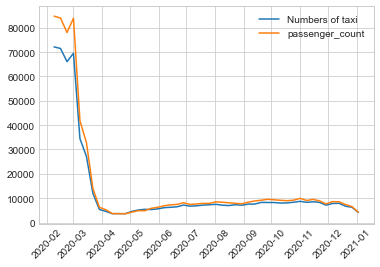

In [35]:
x = dfPweek.index
y1 = dfPweek2.LocationID
y2 = dfPweek.passenger_count



plt.plot(x, y1, label = "Numbers of taxi")
plt.plot(x, y2, label = "passenger_count")
plt.xticks(rotation=45)
plt.legend()



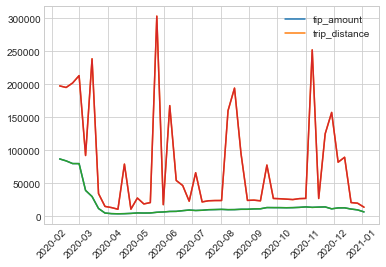

In [36]:
x = dfPweek.index
y1 = dfPweek.tip_amount
y2 = dfPweek.trip_distance


plt.plot(x, y1, label = "tip_amount")
plt.plot(x, y2, label = "trip_distance")
plt.xticks(rotation=45)
plt.legend()



plt.plot(x,y1,y2)

In [37]:
x = dfPweek.index
y1 = dfPweek2.LocationID
y2 = dfPweek.passenger_count

<AxesSubplot:xlabel='lpep_pickup_datetime'>

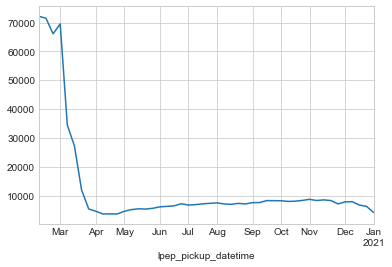

In [38]:
dfPweek2.LocationID.plot()

In [44]:
dfPweek

,LocationID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
lpep_pickup_datetime,,,,,,,,,,,,,,,,,
2020-02-09,7022228,69474.0,7022228,9731572,84790.0,197319.30,883170.42,44940.50,33415.00,86720.92,17006.50,0.0,21238.8,1.131797e+06,95840.0,67262.0,52675.50
2020-02-16,7030314,68840.0,7030314,9531990,83986.0,194971.78,879506.86,45556.50,32663.10,83761.14,17215.48,0.0,21172.8,1.123591e+06,95238.0,66522.0,50976.50
2020-02-23,6527720,63738.0,6527720,8995124,78056.0,201763.46,808013.90,40736.00,30068.00,79694.08,15749.48,0.0,19654.2,1.036750e+06,87442.0,61690.0,49375.50
2020-03-01,6826139,67714.0,6826139,9201983,83897.0,212927.69,852023.61,43331.75,31622.00,79621.42,16378.74,0.0,20648.4,1.084168e+06,94187.0,65148.0,47554.50
2020-03-08,3341424,33672.0,3341424,4578217,41773.0,91926.63,402824.88,13108.25,15655.50,39026.38,7395.60,0.0,10211.7,5.087552e+05,46750.0,32295.0,23548.50
2020-03-15,2597427,26817.0,2597427,3551218,32856.0,238389.14,312842.89,10463.50,12302.50,29812.53,5976.05,0.0,8046.3,3.963373e+05,37156.0,25577.0,18116.75
2020-03-22,1128499,11714.0,1128499,1512222,13982.0,34222.25,135347.43,4478.25,5405.00,11666.11,3068.82,0.0,3551.7,1.702497e+05,16746.0,11186.0,7363.50
2020-03-29,470976,5316.0,470976,669627,6257.0,14795.00,57948.03,1821.75,2459.00,4754.60,973.06,0.0,1595.1,7.275859e+04,7660.0,5088.0,3354.75
2020-04-05,422104,4509.0,422104,561006,5238.0,13041.21,50404.41,1467.50,2087.05,3866.48,919.94,0.0,1355.1,6.257633e+04,6684.0,4316.0,2639.50


<AxesSubplot:title={'center':'My title'}, xlabel='lpep_pickup_datetime', ylabel='values'>

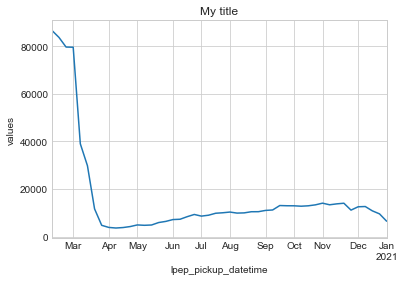

In [43]:
plt.title('Cost')
plt.xlabel('categories')
plt.ylabel('values')
dfPweek.tip_amount.plot()

<AxesSubplot:xlabel='lpep_pickup_datetime'>

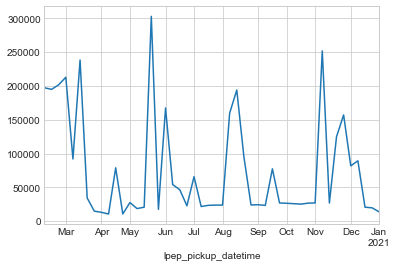

In [40]:
dfPweek.trip_distance.plot()

In [41]:
dfcovid = pd.read_csv(f'data-by-day.csv',error_bad_lines=False)


In [42]:
dfcovid['date_of_interest']  = dfcovid['date_of_interest'].apply(pd.to_datetime)

In [ ]:
dfcovid.head()

In [ ]:
dfcovid = dfcovid.groupby(pd.Grouper(key='date_of_interest', freq='W')).sum()

In [ ]:
dfcovid

In [ ]:
dfcovid2 = dfcovid.head(48)

In [ ]:
dfcovid2.info()

In [ ]:
dfcoo = dfcovid2[['CASE_COUNT_7DAY_AVG','MN_CASE_COUNT_7DAY_AVG','MN_HOSPITALIZED_COUNT_7DAY_AVG','MN_DEATH_COUNT_7DAY_AVG']]

In [ ]:
sns.lineplot(data=dfcoo)
plt.xticks(rotation=45)


In [ ]:

dfcoo2 = dfcovid2[['MN_CASE_COUNT_7DAY_AVG','MN_HOSPITALIZED_COUNT_7DAY_AVG','MN_DEATH_COUNT_7DAY_AVG']]

<AxesSubplot:xlabel='date_of_interest'>

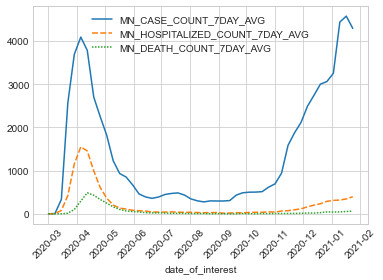

In [49]:
plt.xticks(rotation=45)


sns.lineplot(data=dfcoo2)

In [3]:
dfP= pd.read_csv(f'Pcode.csv',error_bad_lines=False)

In [4]:
dfD= pd.read_csv(f'Dcode.csv',error_bad_lines=False)

In [5]:
dfP

,Unnamed: 0,LocationID,February,March,April,May,June,July,August,September,Octorber,Novermber,December,January(2021),February(2021),OBJECTID,zone,borough
0,0,74,31143,-13400,-14143,1456,1284,537,214,1000,650,-546,-862,-644,-596,74,East Harlem North,Manhattan
1,1,75,26244,-10625,-12347,1404,1329,870,-890,694,759,-687,-77,-486,-776,75,East Harlem South,Manhattan
2,2,41,23022,-9342,-10947,616,599,376,217,117,144,-178,21,-454,-643,41,Central Harlem,Manhattan
3,3,166,16673,-8635,-7172,116,478,315,79,318,59,-94,-281,77,-316,166,Morningside Heights,Manhattan
4,6,42,14376,-5003,-6864,1294,-271,94,73,7,62,-286,-285,-410,-254,42,Central Harlem North,Manhattan
5,9,244,11041,-4507,-5072,394,178,303,64,91,301,-215,-190,220,0,244,Washington Heights South,Manhattan
6,18,116,6188,-2588,-2870,362,27,226,-37,-30,166,-163,-197,3,-209,116,Hamilton Heights,Manhattan
7,20,43,4505,-1831,-2426,178,461,152,-31,359,279,-191,-109,-12,-333,43,Central Park,Manhattan
8,26,152,3085,-1338,-1413,194,-1,97,28,-56,65,-19,-67,5,-110,152,Manhattanville,Manhattan
9,34,243,2185,-897,-1028,166,36,45,44,-7,57,0,-83,-44,-106,243,Washington Heights North,Manhattan


In [ ]:
dfPmean = pd.merge(dfP, meanP, how='inner',left_on="LocationID", right_on="LocationID",  sort=True)

In [75]:
dfPmean.head()

,Unnamed: 0_x,LocationID,February,March,April,May,June,July,August,September,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,185,4,80,-48,-21,-2,7,2,17,-13,...,1.439300,0.067901,1.029835,1.018909,NaN,0.300000,32.408313,1.000000,1.000000,0.000000
1,55,24,1379,-673,-587,38,78,51,-15,64,...,0.479108,0.462333,1.462164,0.150632,NaN,0.296841,14.944138,1.360234,1.002924,0.910490
2,2,41,23022,-9342,-10947,616,599,376,217,117,...,0.400483,0.466748,0.931615,0.125920,NaN,0.296672,12.808257,1.521774,1.010417,0.494848
3,6,42,14376,-5003,-6864,1294,-271,94,73,7,...,0.435943,0.405827,0.775181,0.235644,NaN,0.295187,14.955214,1.600890,1.023846,0.317639
4,20,43,4505,-1831,-2426,178,461,152,-31,359,...,0.593948,0.484073,1.822322,0.113279,NaN,0.298280,16.121260,1.259942,1.003633,1.938706


In [103]:
dfPmean = dfPmean.drop(['DOLocationID'], axis=1)


In [104]:
dfPmean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LocationID             55 non-null     int64  
 1   February               55 non-null     int64  
 2   March                  55 non-null     int64  
 3   April                  55 non-null     int64  
 4   May                    55 non-null     int64  
 5   June                   55 non-null     int64  
 6   July                   55 non-null     int64  
 7   August                 55 non-null     int64  
 8   September              55 non-null     int64  
 9   Octorber               55 non-null     int64  
 10  Novermber              55 non-null     int64  
 11  December               55 non-null     int64  
 12  January(2021)          55 non-null     int64  
 13  February(2021)         55 non-null     int64  
 14  RatecodeID             55 non-null     float64
 15  passenge

In [133]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

<AxesSubplot:>

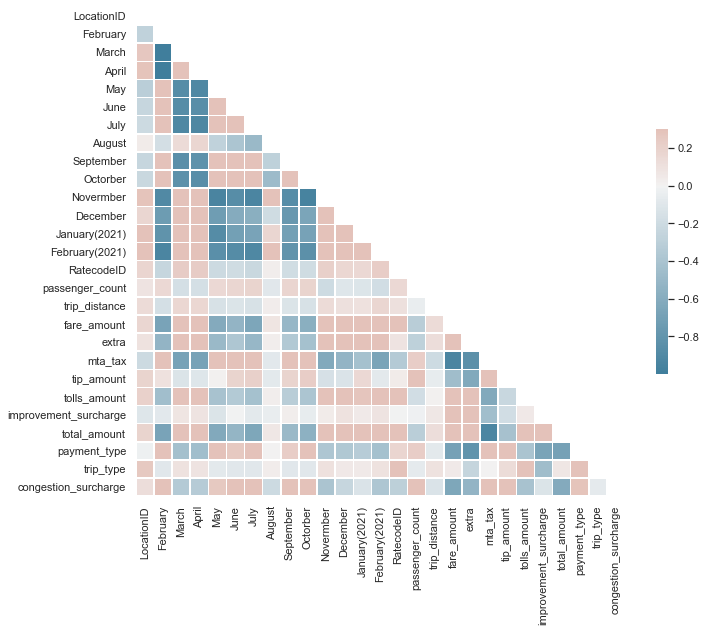

In [134]:



# Compute the correlation matrix
corr = dfPmean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [135]:
dfDmean = pd.merge(dfD, meanD, how='inner',left_on="LocationID", right_on="LocationID",  sort=True)

In [140]:
dfDmean = dfDmean.drop(['DOLocationID','Unnamed: 0_x', 'ehail_fee','Unnamed: 0_y','Unnamed: 0.1', 'OBJECTID','borough' ], axis=1)

<AxesSubplot:>

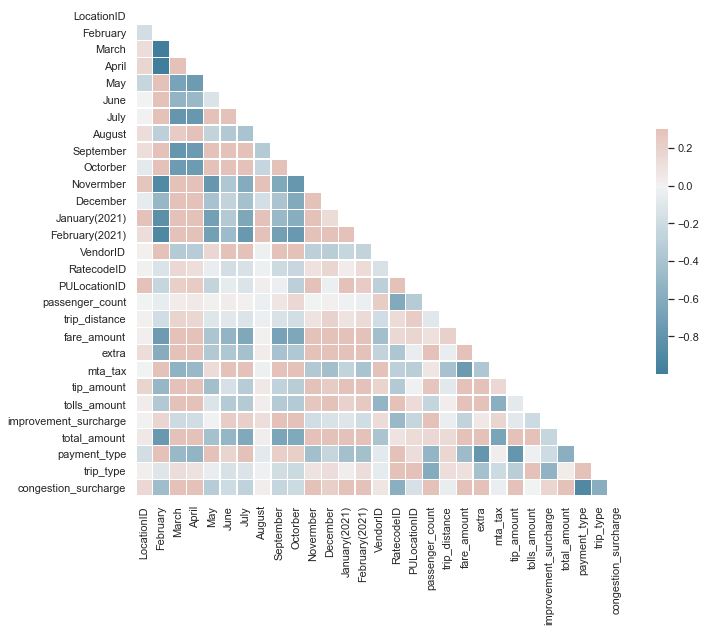

In [142]:

# Compute the correlation matrix
corr = dfDmean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [115]:
dfPmean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LocationID             55 non-null     int64  
 1   February               55 non-null     int64  
 2   March                  55 non-null     int64  
 3   April                  55 non-null     int64  
 4   May                    55 non-null     int64  
 5   June                   55 non-null     int64  
 6   July                   55 non-null     int64  
 7   August                 55 non-null     int64  
 8   September              55 non-null     int64  
 9   Octorber               55 non-null     int64  
 10  Novermber              55 non-null     int64  
 11  December               55 non-null     int64  
 12  January(2021)          55 non-null     int64  
 13  February(2021)         55 non-null     int64  
 14  RatecodeID             55 non-null     float64
 15  passenge

In [116]:
dfPPP = dfPmean[['LocationID','trip_distance','tip_amount']]

In [118]:
dfPPP.rename(columns={'LocationID': 'Number'}, inplace=True)

/Users/axleabner/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [119]:
dfPPP

,Number,trip_distance,tip_amount
0,4,65.6528,1.0298
1,24,2.3583,1.4622
2,41,3.5712,0.9316
3,42,6.2432,0.7752
4,43,2.4547,1.8223
5,45,8.8126,0.5370
6,48,8.8549,1.2489
7,50,7.9610,1.0627
8,68,9.1434,1.2559
9,74,3.4371,1.2218


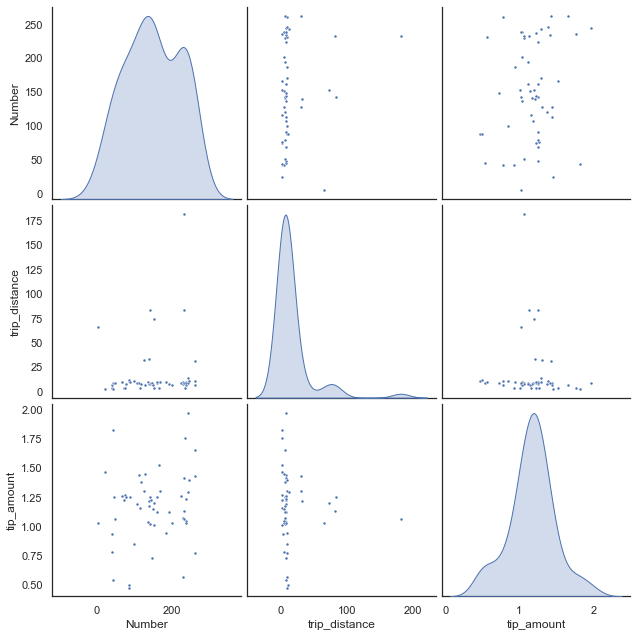

In [120]:
sns.set(style="white")
sns.pairplot(dfPPP, markers=".", height=3, diag_kind='kde');

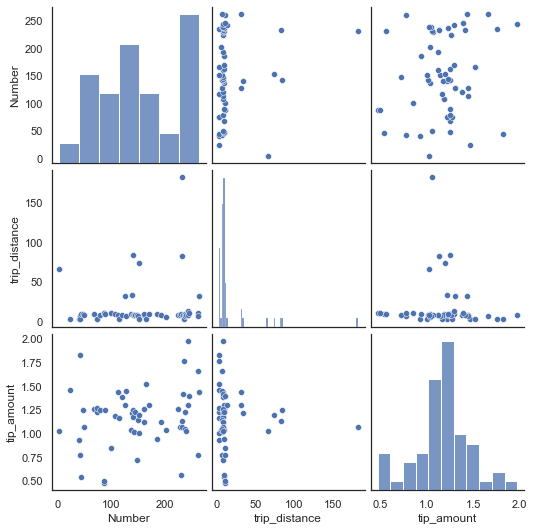

In [143]:
sns.pairplot(dfPPP)

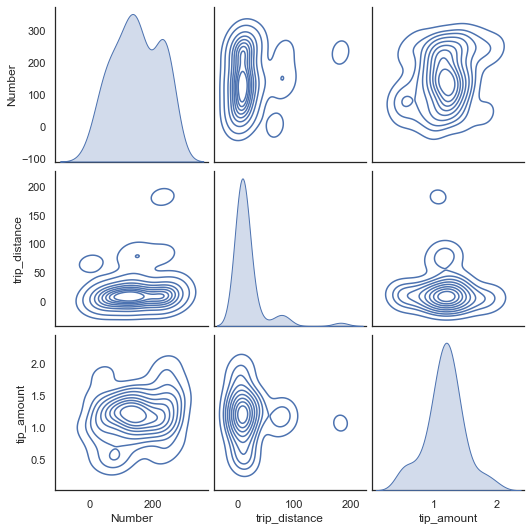

In [124]:
sns.pairplot(dfPPP, kind="kde")

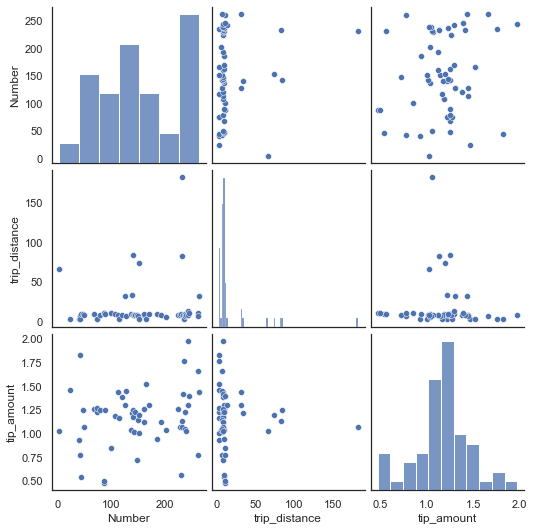

In [144]:
sns.pairplot(dfPPP)